
### Linear Regression

Linear regression is used as a predictive model that assumes a linear relationship between the dependent variable (which is the variable we are trying to predict/estimate) and the independent variable/s (input variable/s used in the prediction). So, this regression techniqaue finds out a linear relationship between x(input) and y(input).

### Steps and questions

- Split your data into a training and test set. Leave the test set for now. Examine the training data for missing and extreme values. Create histograms to show the distribution of the variables and a scatterplot showing the relationship between Years Worked and Salary. Are the data appropriate for linear regression? Is there anything that needs to be transformed or edited first?

- Using the statsmodels package and the training data, run a simple linear regression for Salary with one predictor variable: Years Worked.

- Does the model significantly predict the dependent variable? Report the amount of variance explained (R^2) and significance value (p) to support your answer.

- What percentage of the variance in employees’ salaries is accounted for by the number of years they have worked?
- What does the unstandardized coefficient (B or ‘coef’ in statsmodels) tell you about the relationship between Years Worked and Salary?

- What do the 95% confidence intervals [0.025, 0.975] mean?

- Calculate the expected salary for someone with 12 years’ work experience.

- Calculate the expected salary for someone with 80 years’ work experience. Are there any problems with this prediction? If so, what are they?

- We have only looked at the number of years an employee has worked. What other employee characteristics might influence their salary?

#### Load Required Libraries

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels as sm
from scipy import stats
from scipy.stats import sem
from scipy.stats import pearsonr 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy import stats
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error

In [3]:
#Create DataFrame
sal = pd.read_csv('data/salary .csv')

#Inspect
sal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 514 entries, 0 to 513
Data columns (total 11 columns):
salary         513 non-null float64
exprior        514 non-null int64
yearsworked    514 non-null int64
yearsrank      514 non-null int64
market         514 non-null float64
degree         514 non-null int64
otherqual      514 non-null int64
position       514 non-null int64
male           514 non-null int64
Field          514 non-null int64
yearsabs       514 non-null int64
dtypes: float64(2), int64(9)
memory usage: 44.3 KB


The info method has revealed that there is a missing value in the salary column. Salary has 513 rows while the rest of the data has 514.

In [4]:
#Locate the missing entry
salNaN = sal[sal.salary.isnull()]
salNaN

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
208,NaN,0,21,10,0.93,1,0,3,1,4,1


In [5]:
#Replace NaN value with the mean
sal['salary'].fillna(sal['salary'].mean(),inplace=True)

Salary being our area of interest we have opted to replace it with the mean value of salary as opposed to dropping it completely.
The reason for filling w/ mean instead of dropping is because salary is the target variable and don't want to miss out on any insights it might bring even when it's just one value.

In [6]:
#Validity Check
sal.iloc[208]

salary         50863.220098
exprior            0.000000
yearsworked       21.000000
yearsrank         10.000000
market             0.930000
degree             1.000000
otherqual          0.000000
position           3.000000
male               1.000000
Field              4.000000
yearsabs           1.000000
Name: 208, dtype: float64

From the above we conclude that John Doe who has worked for 21 years earns 50 863,22

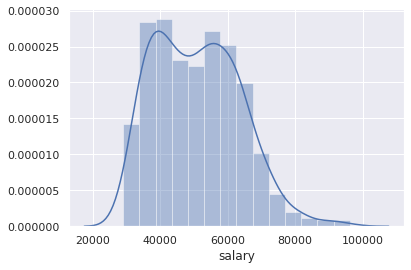

In [12]:
sns.set()
sns.distplot(sal['salary'])
plt.show()

Graph corresponds with mean of 50 000 range

In [9]:
#Rename column name from Male to Gender
sal.rename(columns={"male":"Gender"}, inplace=True)

clean_male = {"Gender": {0:"Female", 1:"Male"}}
sal.replace(clean_male, inplace=True)

male = sal["Gender"]
x = sal["Gender"].value_counts()
print(x)

Male      386
Female    128
Name: Gender, dtype: int64


In [10]:
sal.corr()

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,Field,yearsabs
salary,1.000000,0.119946,0.623135,0.610580,0.407208,0.044552,0.167129,0.701354,-0.498485,-0.069622
exprior,0.119946,1.000000,-0.246549,-0.066403,-0.035041,-0.049373,0.264804,0.116596,-0.048315,0.132380
yearsworked,0.623135,-0.246549,1.000000,0.813471,-0.070896,0.028421,-0.040490,0.746736,-0.261379,0.055468
yearsrank,0.610580,-0.066403,0.813471,1.000000,-0.026975,0.006516,0.007036,0.485210,-0.263953,0.035632
market,0.407208,-0.035041,-0.070896,-0.026975,1.000000,0.036408,0.021692,-0.013358,-0.223827,-0.167068
degree,0.044552,-0.049373,0.028421,0.006516,0.036408,1.000000,-0.214717,0.043680,-0.098424,0.029311
otherqual,0.167129,0.264804,-0.040490,0.007036,0.021692,-0.214717,1.000000,0.160311,-0.076623,-0.017639
position,0.701354,0.116596,0.746736,0.485210,-0.013358,0.043680,0.160311,1.000000,-0.288812,0.029751
Field,-0.498485,-0.048315,-0.261379,-0.263953,-0.223827,-0.098424,-0.076623,-0.288812,1.000000,-0.000127
yearsabs,-0.069622,0.132380,0.055468,0.035632,-0.167068,0.029311,-0.017639,0.029751,-0.000127,1.000000


We used the correlation method with the goal of seeing patterns. By observation there are 3 columns that have a high correlation to our dependent variable(salary). These columns are: 

*yearsworked

*yearsrank

*position 

In [11]:
#splitting data
x = sal
y = sal.salary

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

The 2 varialbes we'll be using for our training models are Salary as the dependent variable
and yearsworked as the independent. We will split the data into a training and test set.
Our data will be split 70/30; 70 being the train size used to train the model.
A random state was also used in order to receive the same sample and results.


In [ ]:
#examining training set
x_train.head()

In [ ]:
#checking the number of rows and columns in training set
x_train.shape

We have 359 Rows and 11 columns in our training set.

#### Relationship between yearsworked and salary

In [ ]:
#data appropriate for linear regression
stats.pearsonr(x_train['yearsworked'],x_train['salary'])

From the correlation coefficient we see that salary and yearsworked are positively correlated as the
correlation is 0.61. 
This suggests that there is a moderate level of correlation between the 2 variables. Since the p-value is <0.005, this implies that the correlation coefficient is statistically significant.


In [ ]:
#plotting scatter plot
sns.regplot(x='yearsworked', y='salary', color='pink', data= x_train, ci= None)
plt.title(" Relationship between Years Worked and Salary", fontsize= 15)
plt.show()



The scatter plot's uphill pattern indicates a positive relationship between our x and y values. In even simpler terms this means as the X-value increases the Y-value tends to follow the same fashion.
The slope of the line of best fit also corroborates the positive association.
By observing the graph you see that there are some outliers which are the furthest points from the line of best fit/ mean.

In [ ]:
sns.set()
#plotting histogram & subplotting
f, axes = plt.subplots(1, 2,figsize=(15, 5))
grid = plt.GridSpec(1, 2, wspace=0.5, hspace=0.3)
plt.subplot(grid[0, 0])
x_train['yearsworked'].hist()
plt.title('Years worked variance', fontsize= 15)
plt.xlabel('Years Worked')
plt.ylabel('Frequency')

plt.subplot(grid[0, 1])
y_train.hist()
plt.title('Salary Variance', fontsize= 15)
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()


#### Creating Model

In [ ]:
#creating model
x_train = sm.add_constant(x_train['yearsworked'])
lm = sm.OLS(y_train, x_train).fit()

In [ ]:
lm.summary()

#### Report the Amount of Variance (R^2)

In [ ]:
print('R-squared: ', lm.rsquared)

Our R-squared is 0.3672 this means is 37%. This indicates that the variables are closely related to each other.

#### Significance Value (p)

A p-value weighs the strength of the evidence (i.e what the data tells you about the population). A value of <0.05 implies significance and that of <0.01 implies high significance. Therefore, our p-value being =0.000 implies high significance.
Therefore we can conclude it is statistically significant.

#### What percentage of the variance in employees’ salaries is accounted for by the number of years they have worked?

It reveals that about 37% of the data fit the regression model.

#### What does the unstandardized coefficient (B or ‘coef’ in statsmodels) tell you about the relationship between Years Worked and Salary?

An unstandardized coefficient represents the amount of change in a dependent variable Y due to a change of 1 unit of independent variable X. So in our case is true the salary does increase with years worked when we look at our graphs above.



#### What do the 95% confidence intervals [0.025, 0.975] mean?¶
   

Our coefficients fall within the confidence interval range. Although we dont have 100% certainty, we are 95% confident that the values are valid.

#### Calculate the expected salary for someone with 12 years’ work experience

In [ ]:
lm.predict([1,12])
print('The expected salary of a person with 12 years experience is:', round(50503.90080319, 2))

#### Calculate the expected salary for someone with 80 years’ work experience. Are there any problems with this prediction? If so, what are they? 

In [ ]:
lm.predict([1,80])
print('The expected salary of a person with 80 years experience is:', round(106749.83660639, 2)) 

- There were no problems to make this prediction which is a concern because 80 years of experince is a rare value prediction in this Regression because no one can work over 80 years.
- meaning I can't really rely on the prediction because 80 years is too long

In [ ]:
sal['yearsworked'].max()

#### We have only looked at the number of years an employee has worked. What other employee characteristics might influence their salary?

Refering to the correlation table we have above, position and years ranked are other employee charateristics with influence on salary.

In [ ]:
import numpy as np
from sklearn import metrics

In [ ]:
trainRMSE = np.sqrt(metrics.mean_squared_error(y_train, model.predict(X_train)))
trainRMSE

In [ ]:
testRMSE = np.sqrt(metrics.mean_squared_error(Y_test, model.predict(X_test)))
testRMSE

- RMSE indicates the absolute fit of the model to the data (how close the actual data points are to the model's predicted ones.)
- Trainset RMSE is bigger than the Test RMSE
- RMSE is a good measure of how accurately the model predicts the target variable. It is the most important criteria for fit if the main purpose of the model is prediction.